# **AP155 Lab Assignment** 
## Module 7: Random Process and Monte Carlo Methods

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 and 2 are worth 30 and 70 points, respectively).

_Due Date_: **5PM of January 7 (Fri)**


### Student Information 

_Full Name (Last Name, First Name)_: Andeo, Lovely\
_Student No._: 2020-05405\
_Section_: HX4

### Submission Information

_Date and Time Submitted (most recent upload)_: 

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Lovely Andeo** 

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/30
* Problem 2 - []/70

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

### PROBLEM 1 (30 pts.; 50/50 for code & discussion) 
**Integration with Monte Carlo methods**

_Refer to Exercise 10.5 in the Newman text_ 

1. Evaluate this integral 
$$ I = \int_0^2 \sin^2\left[\frac{1}{x(2-x)}\right] {\rm d}x.$$
using the "hit-or-miss" Monte Carlo method of Section 10.2 with 10,000 points. Also evaluate the error on your estimate. *(15 pts.)*

2. Now estimate the integral again using the mean value method with 10,000 points. Also evaluate the error. *(15 pts.)*

**Solution**

**1.1** To evaluate this pathological function using the "hit-or-miss" method, we use the formula
$$I \approx \dfrac{kA}{N}$$
where $A$ is the area of the bounding rectangle, $N$ is the number of the random points in the bounding rectangle, $k$ is number of points below the curve.


To code that, we have to first import all the needed packages. Next is to define the necessary variables as well as the function to be evaluated. Then we execute the integration by using the $\tt random()$ function to generate random floating-point numbers inside a $\tt for$ loop. Note that if the value of $y$ is less than our function, it means it falls under the curve so we add an increment to the count. 

Then, we evaluate the value of $I$, to get the approximation of the integral. And lastly, we evalute the error. 

In [3]:
# Importing all the necessary packages
from math import sin, sqrt
from random import random
import numpy as np

# Defining the variables
N = 10000 # number of points
k = 0 # count
A = 2 # area

# Defining the function to be integrated
def f(x):
    return (sin(1/(x*(2-x))))**2

# Executing the integration using the hit-or-miss method
for i in range(N):
    x = 2*random() # draws from 0 to 2
    y = random() # draws from 0 to 1
    if y<f(x):
        k += 1 

# Getting the approximation
I = 2*k/N

# Evaluating the error
hm_err = sqrt(I*(A-I))/sqrt(N)

print("The integral approximation is " + str(I) + " with an error of " + str(hm_err))

The integral approximation is 1.4552 with an error of 0.008903892182635636


However, this method is not really known for its accuracy, so it's usually just used in pathological cases like this one.

**1.2** Now, we estimate the integral again, but using the mean value method which is relatively more accurate than the previous one.

To do that, we use this formula

$$I \approx \dfrac{b-a}{N} \sum_{i=1}^N f(x_i)$$

where in $a$ and $b$ are the bounds of the integral, $N$ is the number of points, and $f(x_1)$ is the function to be evaluated. Which allows us to get the mean value approximation of $f$ over the full interval.

Hence, to code that, we first define the variables given in the problem. Then, we execute the method in a $\tt for$ loop using the formula above and using the $\tt random()$ function again to generate random numbers. Note that we will also be getting the variance,
$$f = \langle f^2 \rangle - \langle f \rangle^2$$
hence, we also include getting the square of $\langle f\rangle$ inside the loop. Lastly, we get the approximation and evaluate the error.

In [12]:
# Defining the variables
a = 0
b = 2
N = 10000 # points

# Executing the integration using the mean value method
sum = 0
square = 0
for i in range(N):
    x = 2*np.random.rand()
    sum += f(x)
    square += f(x) ** 2

# Getting the approximation
I = (b-a)/N * (sum)

# Evaluating the error
var = (sum - square) / N
mv_err = 2 / np.sqrt(N) * np.sqrt(var)

print("The integral approximation is " + str(I) + " with an error of " + str(mv_err))

The integral approximation is 1.4545554546221435 with an error of 0.007191785227992888


The mean value method is indeed more accurate than the hit-or-miss method, but in some cases like when the integral is finite but diverges to $0$, this method also breaks down.

### PROBLEM 2 (70 pts.; 50/50 for code & discussion) 
**The Ising model**

_Refer to Exercise 10.9 in the Newman text._ The Ising model is a theoretical model of a magnet. The magnetic potential energy due to the interaction of two dipoles is proportional to their dot product, but in the Ising model this simplifies to just the product $s_i s_j$ for spins on sites $i$ and $j$ of the lattice, since the spins are one-dimensional scalars, not vectors. Then the actual energy of interaction is $-Js_i s_j$, where $J$ is a positive interaction constant. The minus sign ensures that the in- teractions are ferromagnetic, meaning the energy is lower when dipoles are lined up. A ferromagnetic interaction implies that the material will magnetize if given the chance.

Normally it is assumed that spins interact only with those that are immediately adjacent to them on the lattice, which gives a total energy for the entire system equal to
$$ E = -J \sum_{\langle ij \rangle} s_i s_j,$$
where the notation $\langle ij \rangle$ indicates a sum over pairs $i,j$ that are adjacent on the lattice. On the square lattice we use in this exercise each spin has four adjacent neighbors with which it interacts, except for the spins at the edges of the lattice, which have either two or three neighbors.

Perform a Markov chain Monte Carlo simulation of the Ising model on the square lattice for a system of 20 x 20 spins. You will need to set up variables to hold the value ±1 of the spin on each lattice site, probably using a two-dimensional integer array, and then take the following steps.

1. Write a function to calculate the total energy of the system, as given by the equation above. That is, for a given array of values of the spins, go through every pair of adjacent spins and add up the contributions $s_i s_j$ from all of them, then multiply by $-J$. Hint 1: Each unique pair of adjacent spins crops up only once in the sum. Thus there is a term $-Js_1s_2$ if spins 1 and 2 are adjacent to one another, but you do not also need a term $-Js_2s_1$. Hint 2: To make your final program to run in a reasonable amount of time, you will find it helpful if you can work out a way to calculate the energy using Python's ability to do arithmetic with entire arrays at once. If you do the calculation step by step, your program will be significantly slower. *(20 pts.)*

2. Now use your function as the basis for a Metropolis-style simulation of the Ising model with $J = 1$ and temperature $T = 1$ in units where the Boltzmann constant $k_B$ is also 1. Initially set the spin variables randomly to ±1, so that on average about a half of them are up and a half down, giving a total magneti- zation of roughly zero. Then choose a spin at random, flip it, and calculate the new energy after it is flipped, and hence also the change in energy as a result of the flip. Then decide whether to accept the flip using the Metropolis acceptance formula, Eq. (10.60). If the move is rejected you will have to flip the spin back to where it was. Otherwise you keep the flipped spip. Now repeat this process for many moves. *(20 pts.)*

3. Make a plot of the total magnetization $M = \sum_i s_i$ of the system as a function of time for a million Monte Carlo steps. You should see that the system develops a "spontaneous magnetization," a nonzero value of the overall magnetization. Hint: While you are working on your program, do shorter runs, of maybe ten thousand steps at a time. Once you have it working properly, do a longer run of a million steps to get the final results. *(20 pts.)*

4. Run your program several times and observe the sign of the magnetization that develops, positive or negative. Describe what you find and give a brief explanation of what is happening. *(10 pts.)*

**Solution**

First thing to do is to import all the libraries and packages needed. Then set up variables to hold the value ±1 of the spin on each lattice site using a two-dimensional integer array. We also display the lattice to check.

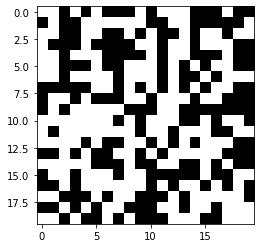

In [41]:
# For plotting
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import Image

# Defining the lattice
size = 20
lattice = np.random.choice([-1,1], [size, size])

# Displaying the lattice
plt.imshow(lattice, cmap = "gray")
plt.show()

**2.1** Now, we write a function that could calculate the total energy of the system using the equation
$$ E = -J \sum_{\langle ij \rangle} s_i s_j,$$
where the notation $\langle ij \rangle$ indicates a sum over pairs $i,j$ that are adjacent on the lattice. It has to be that for a given array of values of the spins, the code goes through every pair of adjacent spins and add up the contributions $s_i s_j$ from all of them, then multiply by $-J$.

In [ ]:
# Defining a function to solve the total energy of the system
J = 1
def E_total(lattice):
    row = 0
    col = 0
    for i in range(len(lattice)):
        try:
            row += np.sum(lattice[i, :]*lattice[i+1, :])
        except:
            continue
    for j in range(len(lattice)):
        try:
            col += np.sum(lattice[:, j]*lattice[:, j+1])
        except:
            continue
    return -J*(row + col)

Then we solve for the total energy of the system using the function above.

In [42]:
# Solving for the energy of the system
E = E_total(lattice)
print("Total energy: ", E, "units")


The total energy of the system is: -18 units


**2.2** Next, we use the function as the basis for a Metropolis-style simulation of the Ising model with $J = 1$ and temperature $T = 1$ in units where the Boltzmann constant $k_B$ is also 1.

First, intialize the variables and constants. And since we'll need to solve for the energy of a single particle and the acceptance probability, we define a function for each of them. Note the formula for the acceptance probability given by equation 10.60:
$$
 P_a = \begin{cases}1 & \rm{if~E_j \leq E_i}\\ \rm{e}^{-\beta(E_j - E'-i)} & \rm{if~E_j > E_i}\end{cases}.
$$
where $E_i$ is the initial energy and $E_j$ is the new energy.

In [43]:
# Initializing the variables and constants 
J = 1
T = 1
kb = 1 # Boltzmann constant
beta = 1/kb/T
N = 1000000

# Defining a function to solve the energy of a single particle
def solve_E(lattice, x, y):
    E = 0
    try:
        E += lattice[x,y]*lattice[x+1,y]
    except:
        pass
    try:
        E += lattice[x,y]*lattice[x, y+1]
    except:
        pass
    if x != 0:
        E += lattice[x,y]*lattice[x-1, y]
    if y != 0:
        E += lattice[x,y]*lattice[x, y-1]
    return -J*E

# Defining a function to solve the acceptance probability
def solve_pa(E, Enew):
    pa = 0
    if Enew <= E:
        pa = 1
    else:
        pa = np.exp(-beta*(Enew - E))
    return pa

How the process works is we basically choose a spin at random, calculate the initial energy, flip it, calculate the new energy, and then decide whether to accept or reject the new state using the Metropolis acceptance formula (acceptance probability).

If rejected, we have to flip the spin back. If accepted, keep it flipped. Then repeat the process.

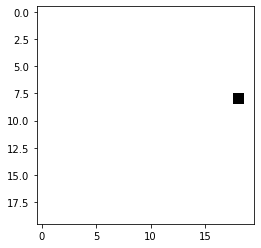

In [44]:
# For storing the generated images later on
counter = 0                 
frames = []                 
fig = plt.figure()

# Executing the process
for i in range(N+1):
    x = np.random.randint(0,size)
    y = np.random.randint(0,size)
    E = solve_E(lattice, x, y) # calculating initial energy
    lattice[x,y] = lattice[x,y]*(-1) # flipping the spin
    Enew = solve_E(lattice, x, y) # calculating new energy
    pa = solve_pa(E, Enew) # solving for the acceptance probability
    flip_back = lattice.copy() # flipping back the spin if rejected

    # Checking if it is accepted or rejected
    if pa < 1:
        if np.random.rand() <= pa:
            if counter%100 == 0:
                frames.append([plt.imshow(lattice, cmap = "gray")])
            counter +=1 
        elif np.random.rand() > pa:
            lattice[:] = flip_back[:]
    else: 
        if counter%100 == 0:
            frames.append([plt.imshow(lattice, cmap = "gray")])
        counter +=1

**2.3** For better visualization, the plots for every 100 accepted inversions were stored and compiled into a GIF. This allows us to observe the magnitization over time.

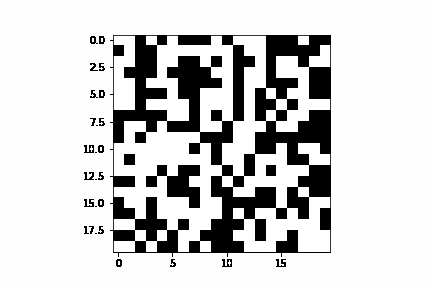

In [45]:
# Compiling the frames into a gif
plt.close()
ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True, repeat_delay=1000)
writergif = animation.PillowWriter(fps=15)
ani.save('Problem 2 animation.gif',writer=writergif)

Image(filename = "Problem 2 animation.gif")

**2.4** After running the program several times and compiling the plots of the accpeted inversions, we can observe from the visual above that for a million Monte Carlo steps, the lattice shows a "spontaneous magnetization". There is an accumulation of the black and white pixels across the lattice indicating a lower energy.